# 感知机
## 模型
假设输入空间（特征空间）是$X \in R^{n}$，输出空间是$Y=\{+1,-1\}$。输入的表示实例的特征向量，对应于输入空间的点，输出表示实例的类别。输入空间到输出空间的映射函数是$$f(x)=sign(\omega*x+b)$$称为感知机，其中$sign$是符号函数，即：$$sign(x)=\begin{cases} 1, & x>0 \\ -1, & x<0 \end{cases}$$  
感知机模型的假设空间是定义在特征空间中所有线性分类模型，即函数集$\{f|f(x)=\omega*x+b\}$

## 损失函数
假设训练数据集是线性可分的，感知机学习的目的是求得一个能够将训练数据正负实例完全正确分开的分离超平面。  
感知机采用的损失函数是：所有误分类的点到超平面的总距离。

- 点到直线距离
回顾一下点到直线距离的推导：  
假设有直线L：$w^{T}x+b=0$，点$P$是直线外的一点，点$P^{*}$是经过点$P$与直线L垂直相交的点，L的法向量为$w$，则有：$$\begin{cases} P-P^{*}=\alpha \\ w^{T}p+b=0 \end{cases}$$  
将式1带入式2，两边同时左乘$w^{T}$，有$$w^{T}p-w^{T}p^{*}=\alpha ||w|| $$ $$\alpha=\frac{w^{T}p+b}{||w||}$$  
$\alpha$就是点到直线的距离

对于误分类的点集合M，经验风险为：$$L(w,b)=-\sum\limits_{x_{i} \in M}y_{i}(w*x_{i}+b)$$
## 优化
对于L，分别对w和b求梯度下降方向得$$\begin{cases} \nabla _{w}L(w,b)=-\sum y_{i}x_{i} \\ \nabla _{b}L(w,b)=-\sum y_{i} \end{cases}$$
更新权值：$$\begin{cases} w=w+\eta y_{i}x_{i} \\ b=b+\eta y_{i} \end{cases}$$

## 算法原始形式
整理一下，算法的原始形式步骤如下所示：
<img src="https://raw.githubusercontent.com/nanyoullm/nanyoullm.github.io/master/img/%E6%84%9F%E7%9F%A5%E6%9C%BA%E7%AE%97%E6%B3%95%E5%8E%9F%E5%A7%8B%E5%BD%A2%E5%BC%8F.png" width="600" alt="感知机算法原始形式"/>


## 对偶形式
对偶形式的基本想法是：将$w$和$b$表示为实例$x_{i}$和标记$y_{i}$的线性组合的形式，通过求解其系数而求得$w$和$b$
<img src="https://raw.githubusercontent.com/nanyoullm/nanyoullm.github.io/master/img/%E6%84%9F%E7%9F%A5%E6%9C%BA%E5%AF%B9%E5%81%B6%E5%BD%A2%E5%BC%8F1.png" width="600" alt="感知机算法对偶形式1"/>
<img src="https://raw.githubusercontent.com/nanyoullm/nanyoullm.github.io/master/img/%E6%84%9F%E7%9F%A5%E6%9C%BA%E5%AF%B9%E5%81%B6%E5%BD%A2%E5%BC%8F2.png" width="600" alt="感知机算法对偶形式2"/>

## Try it with Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- 正样本点：[3, 3], [2, 2]
- 负样本点：[1, 2], [2, 4]
- 看一下正负样本的分布，显然是线性可分的。

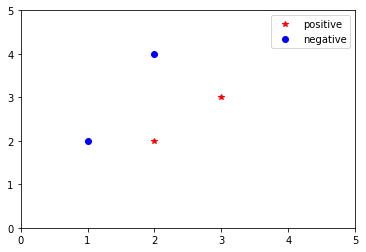

In [2]:
plt.plot([3, 2], [3, 2], 'r*', label='positive')
plt.plot([1, 2], [2, 4], 'bo', label='negative')
plt.axis([0, 5, 0, 5])
plt.legend(loc='best')
plt.show()

In [3]:
# 样本数据
x_data = np.array([[3, 3], [2, 2], [1, 2], [2, 4]])
y_data = np.array([1, 1, -1, -1])
# 设定初始值
w = np.random.rand(2)
b = 0

In [4]:
# 开始迭代
lr = 0.5
for step in range(10):
    for i in range(x_data.shape[0]):
        if y_data[i] * ((w * x_data[i]).sum() + b) <= 0:
            w = w + lr * (y_data[i] * x_data[i])
            b = b + lr * (y_data[i])
            print('w: {}, b: {}'.format(w, b))

w: [-0.29489446 -0.06788728], b: -0.5
w: [ 1.20510554  1.43211272], b: 0.0
w: [ 0.70510554  0.43211272], b: -0.5
w: [-0.29489446 -1.56788728], b: -1.0
w: [ 1.20510554 -0.06788728], b: -0.5
w: [ 0.70510554 -1.06788728], b: -1.0
w: [ 2.20510554  0.43211272], b: -0.5
w: [ 1.70510554 -0.56788728], b: -1.0
w: [ 0.70510554 -2.56788728], b: -1.5
w: [ 2.20510554 -1.06788728], b: -1.0


In [5]:
# 选取分类直线上的任意两个点
xa = -10
xb = 10
ya = - (w[0] * xa + b) / w[1]
yb = - (w[0] * xb + b) / w[1]

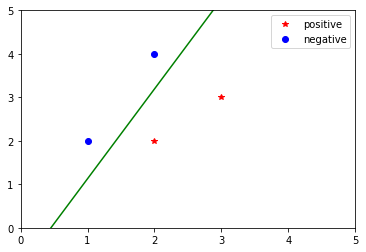

In [6]:
plt.plot([3, 2], [3, 2], 'r*', label='positive')
plt.plot([1, 2], [2, 4], 'bo', label='negative')
plt.plot([xa, xb], [ya, yb], 'g-')
plt.axis([0, 5, 0, 5])
plt.legend(loc='best')
plt.show()

- 经过10次内的迭代，我们可以看到绿色的分类线（二维）可以完全把数据集分开。
- 可以将线性可分的数据集完全分类的分界线有无数个，但是哪一个是最优的呢？那就要学习统计学习算法中的顶上明珠--SVM了！
## enjoy it.